In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
income_bins = [0, 20, 40, 60, 80, 100, 120, 140]
income_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Ultra High']
data['Income Bracket'] = pd.cut(data['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)

In [4]:
income_bins = [0, 20, 40, 60, 80, 100, 120, 140]
income_labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Ultra High']
data['Income Bracket'] = pd.cut(data['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Bracket
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Low
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Low
4,5,Female,31,17,40,Low
...,...,...,...,...,...,...
195,196,Female,35,120,79,Ultra High
196,197,Female,45,126,28,Ultra High
197,198,Male,32,126,74,Ultra High
198,199,Male,32,137,18,Ultra High


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Income Bracket            0
dtype: int64

In [6]:
data['Gender'] = data['Gender'].astype('category')
print(data.dtypes)

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Income Bracket            category
dtype: object


In [7]:
# One-hot encoding for 'Gender'
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


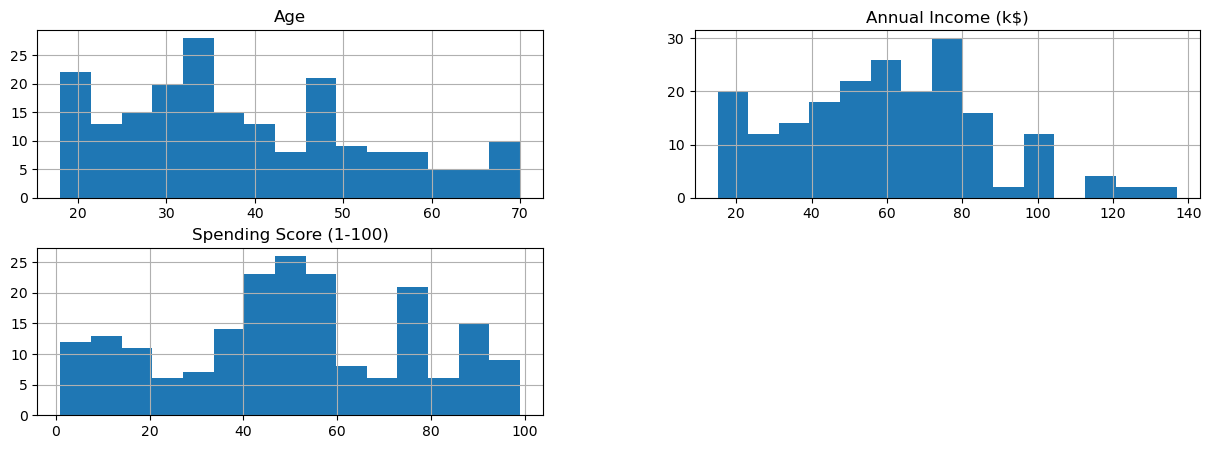

In [9]:
import seaborn as sns

data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(15, 5))
plt.show()

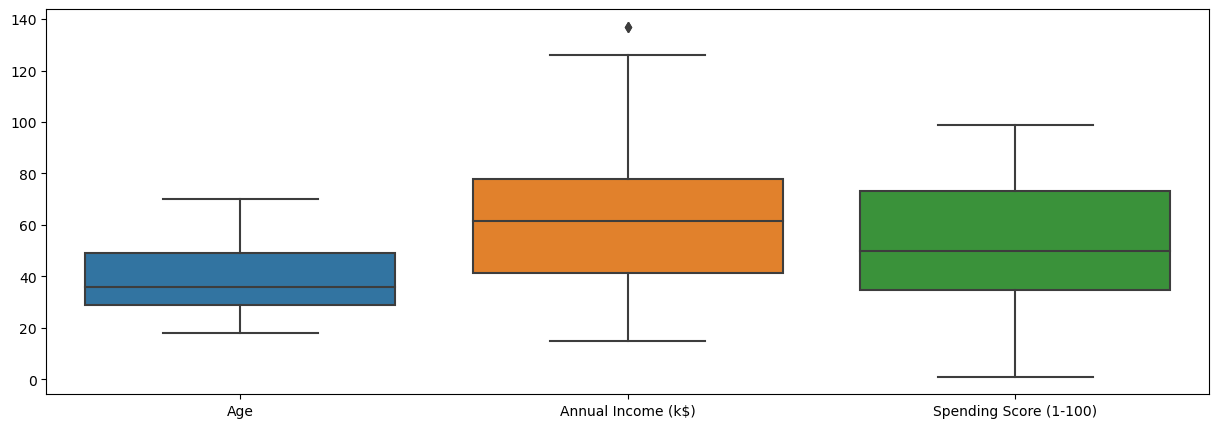

In [10]:
# Box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

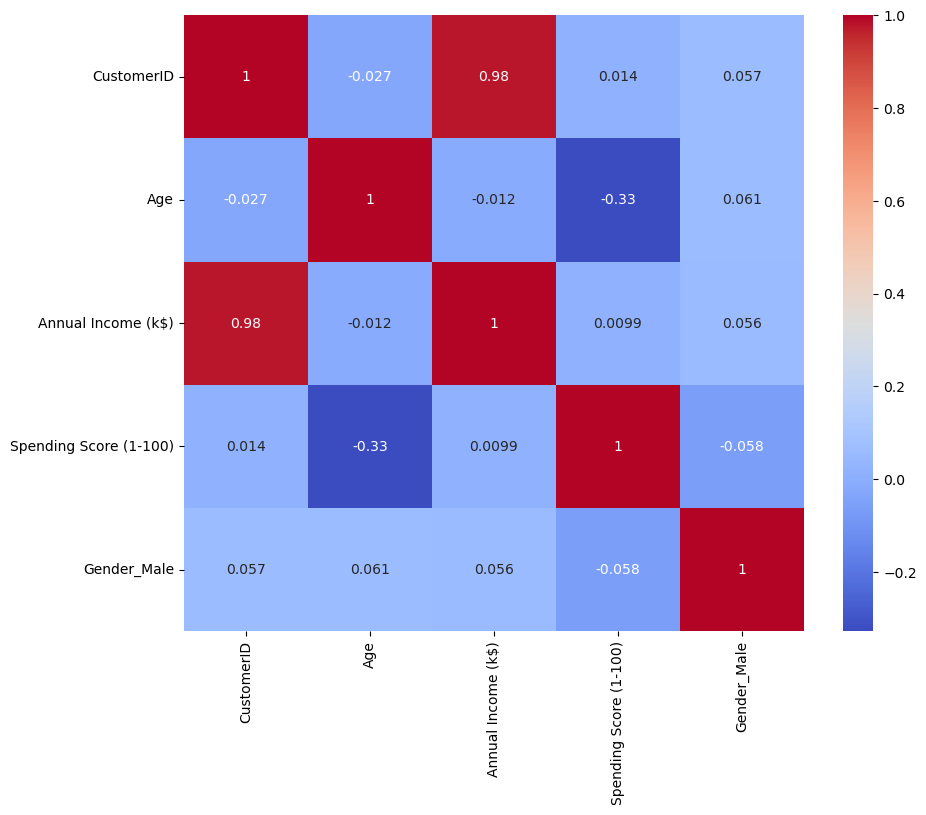

In [11]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

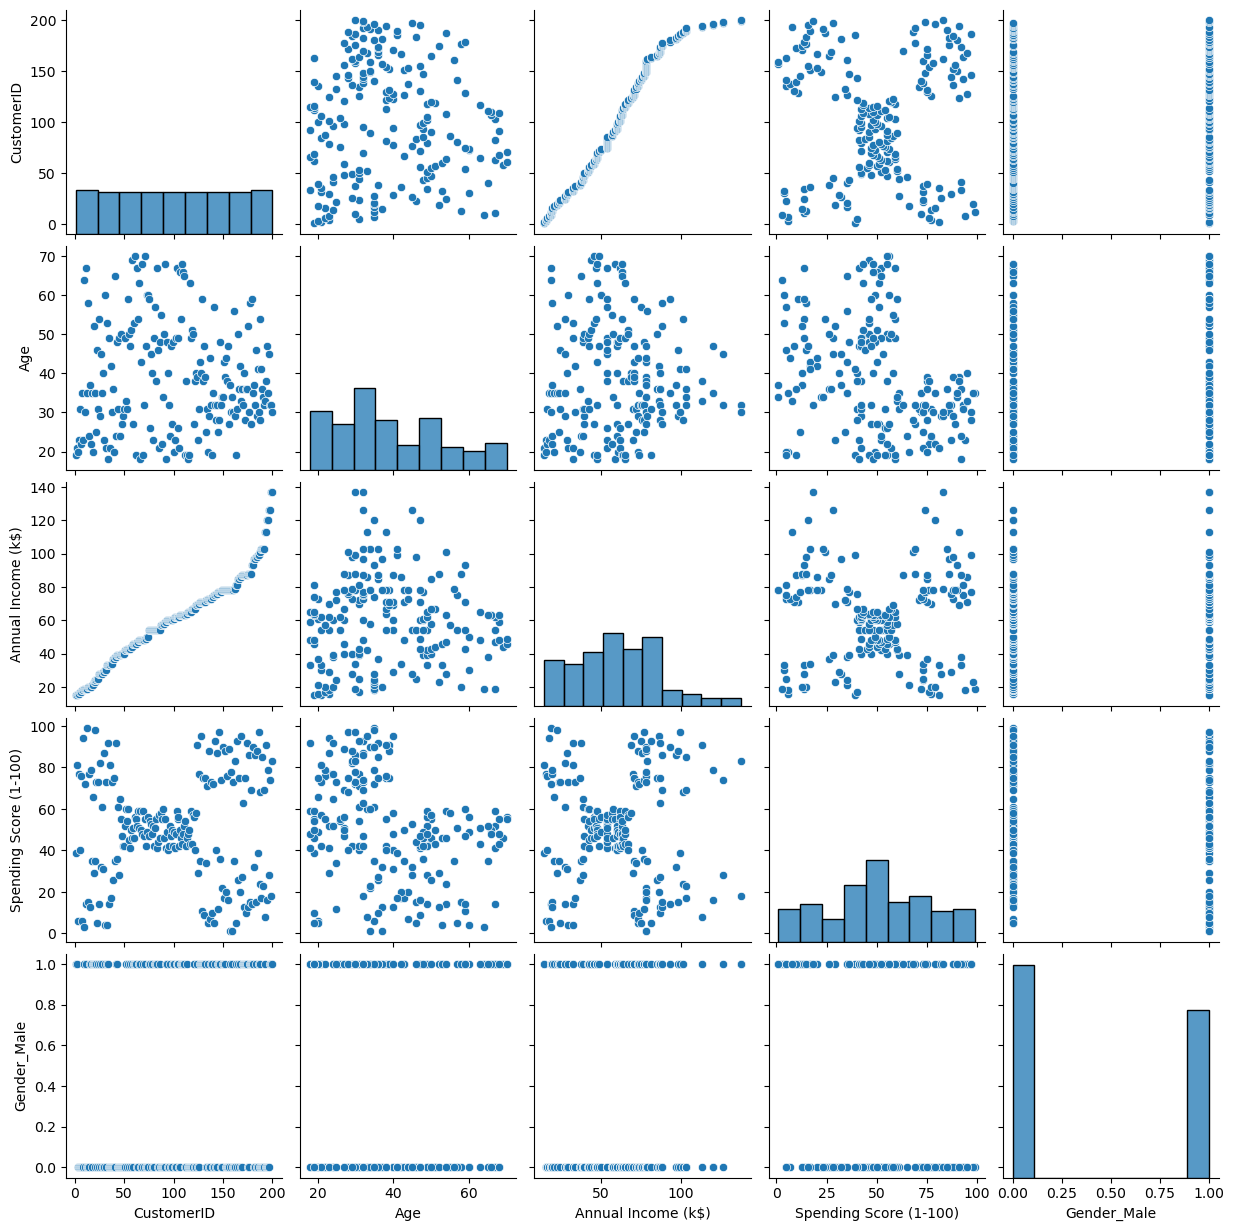

In [12]:
# Pair plots
sns.pairplot(data)
plt.show()

In [13]:
# Selecting relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

D:\Softwares\Anaconda_installed\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


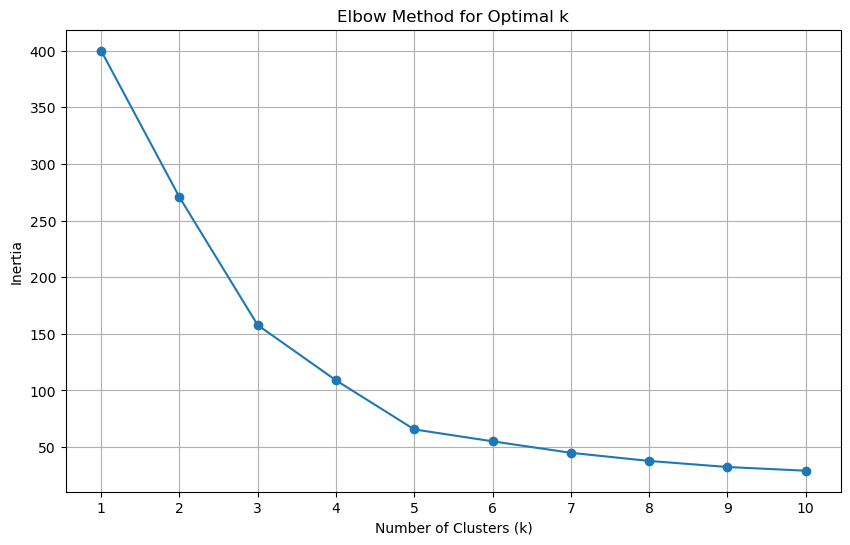

In [15]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

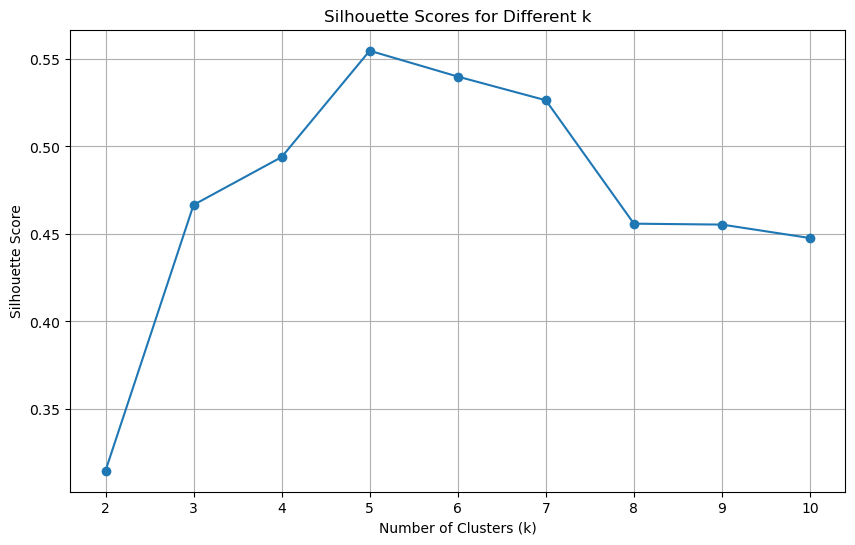

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values[1:]:  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.grid()
plt.show()

In [17]:
# Applying K-Means with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


print(data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  15                      81        3
2           3                  16                       6        2
3           4                  16                      77        3
4           5                  17                      40        2


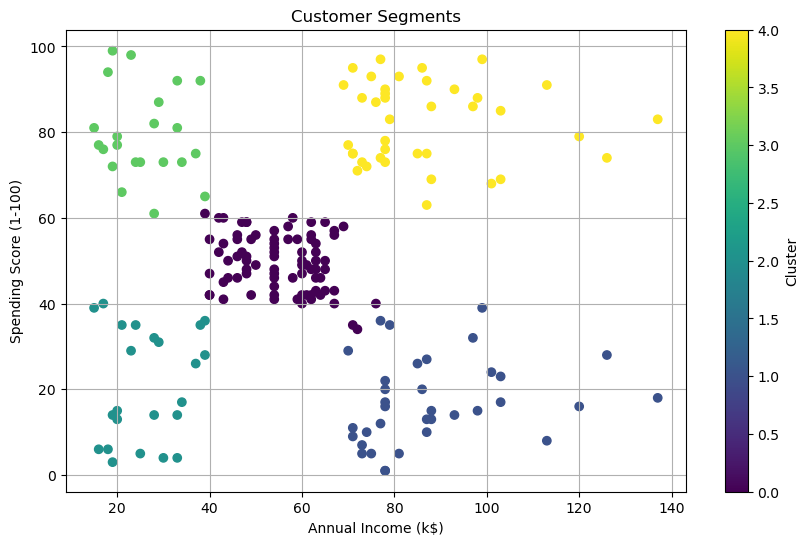

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()